<a href="https://colab.research.google.com/github/Leon-web-net/Computer_Vision/blob/main/Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
print(torch.__version__)

2.4.1+cu121


# Load Images

In [ ]:
# !ls /content/drive/MyDrive/KITTI_sample_data/
# !mkdir -p /content/drive/MyDrive/KITTI_sample_data/Extracted_obj_detection

Obj_detection.tar


In [ ]:
# !tar -tf /content/drive/MyDrive/KITTI_sample_data/Obj_detection.tar

tar: /content/drive/Mydrive/KITTI_sample_data/Obj_detection.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
# !tar -xvf /content/drive/MyDrive/KITTI_sample_data/Obj_detection.tar -C /content/drive/MyDrive/KITTI_sample_data/Extracted_obj_detection

tar: Removing leading `/' from member names
/
LICENSE.md
README.md
meta.json
test/
test/ann/
test/ann/000034.png.json
test/ann/000035.png.json
test/ann/000040.png.json
test/ann/000070.png.json
test/ann/000082.png.json
test/ann/000102.png.json
test/ann/000124.png.json
test/ann/000141.png.json
test/ann/000158.png.json
test/ann/000175.png.json
test/ann/000182.png.json
test/ann/000233.png.json
test/ann/000278.png.json
test/ann/000303.png.json
test/ann/000380.png.json
test/ann/000397.png.json
test/ann/000401.png.json
test/ann/000409.png.json
test/ann/000411.png.json
test/ann/000420.png.json
test/ann/000454.png.json
test/ann/000464.png.json
test/ann/000469.png.json
test/ann/000473.png.json
test/ann/000489.png.json
test/ann/000552.png.json
test/ann/000564.png.json
test/ann/000581.png.json
test/ann/000583.png.json
test/ann/000624.png.json
test/ann/000649.png.json
test/ann/000659.png.json
test/ann/000668.png.json
test/ann/000678.png.json
test/ann/000713.png.json
test/ann/000760.png.json
test/an

# Visualise data

000034.png  000303.png	000564.png  000817.png	001187.png  001434.png	001798.png  002061.png
000035.png  000380.png	000581.png  000836.png	001215.png  001477.png	001802.png  002067.png
000040.png  000397.png	000583.png  000852.png	001234.png  001494.png	001823.png  002110.png
000070.png  000401.png	000624.png  000906.png	001265.png  001586.png	001849.png  002180.png
000082.png  000409.png	000649.png  000915.png	001289.png  001622.png	001880.png  002192.png
000102.png  000411.png	000659.png  000917.png	001294.png  001658.png	001954.png  002195.png
000124.png  000420.png	000668.png  000960.png	001302.png  001694.png	001957.png  002212.png
000141.png  000454.png	000678.png  000992.png	001318.png  001705.png	001966.png
000158.png  000464.png	000713.png  001014.png	001322.png  001754.png	001986.png
000175.png  000469.png	000760.png  001103.png	001325.png  001768.png	002018.png
000182.png  000473.png	000767.png  001119.png	001345.png  001770.png	002035.png
000233.png  000489.png	000768.png  0

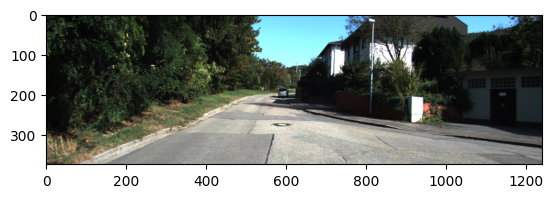

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

image_folder ="/content/drive/MyDrive/KITTI_sample_data/Extracted_obj_detection"
!ls {image_folder}/test/img/

image_path = image_folder +"/test/img/000034.png"
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

# Convert to tensor

In [ ]:
import torch
import torchvision
from PIL import Image
from pathlib import Path
import torchvision.transforms as transforms
import os
from os import listdir

img_path = "/content/drive/MyDrive/KITTI_sample_data/Extracted_obj_detection/test/img/"

# img = Image.open(img_path+"000034.png")
transform = transforms.Compose([transforms.PILToTensor()])

image_tensors = []
PIL_images= []
for image in os.listdir(img_path):
  try:
    PIL_image = Image.open(img_path + image)
    PIL_images.append(PIL_image)
    img_tensor = transform(PIL_image)
    image_tensors.append(img_tensor)
    # print(f"Image: {image} | image shape {img_tensor.shape}")
  except OSError as e:
    print(f"Error processing image {PIL_image}: {e}") # Print the error and the problematic image filename
    # You can choose to skip the corrupted image or attempt to repair it.
    # Skipping the image is often the easiest solution.
    continue # Skip to the next image










https://huggingface.co/microsoft/conditional-detr-resnet-50


In [ ]:
!pip install timm

# Load model using huggingface pipeline

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("object-detection", model="microsoft/conditional-detr-resnet-50")

# for image in PIL_images:
#   try:
#     results = pipe(image)
#     print(results)
#   except (OSError, UnidentifiedImageError) as e:
#     print(f"Error processing image {image}: {e}")
#     # You can choose to skip the corrupted image or attempt to repair it.
#     # Skipping the image is often the easiest solution.
#     continue # Skip to the next image

test_image = PIL_images[0]

result = pipe(test_image)



AttributeError: 'list' object has no attribute 'size'

## Analyse model results

In [ ]:
print(len(result))
for i in result:
  print(i["box"])
co_ords = result[0]['box']
width, height = co_ords["xmax"] - co_ords["xmin"], co_ords["ymax"] - co_ords["ymin"]


6
{'xmin': 0, 'ymin': 199, 'xmax': 110, 'ymax': 323}
{'xmin': 912, 'ymin': 167, 'xmax': 1068, 'ymax': 232}
{'xmin': 154, 'ymin': 177, 'xmax': 248, 'ymax': 241}
{'xmin': 1030, 'ymin': 163, 'xmax': 1177, 'ymax': 227}
{'xmin': 515, 'ymin': 181, 'xmax': 582, 'ymax': 226}
{'xmin': 686, 'ymin': 177, 'xmax': 768, 'ymax': 229}
{'xmin': 0, 'ymin': 199, 'xmax': 110, 'ymax': 323}


## Visualise results

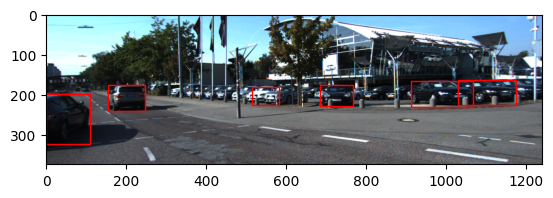

In [ ]:

# Create figure and axes
fig, ax = plt.subplots()

ax.imshow(test_image)

for i in result:
  co_ords = i['box']
  width, height = co_ords["xmax"] - co_ords["xmin"], co_ords["ymax"] - co_ords["ymin"]
  # Create a Rectangle patch
  rect = patches.Rectangle((co_ords["xmin"], co_ords["ymin"]), width, height, linewidth=1, edgecolor='r', facecolor='none')

  # Add the patch to the Axes
  ax.add_patch(rect)


plt.show()